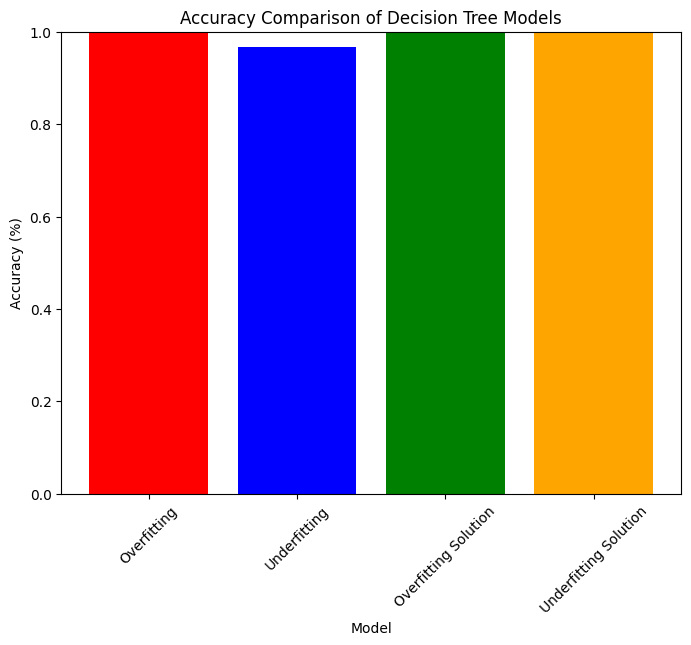

Overfitting Decision Tree Model
Accuracy on Test Set (Overfitting): 100.00%

Underfitting Decision Tree Model
Accuracy on Test Set (Underfitting): 96.67%

Solution for Overfitting (Max Depth 3, Pruning)
Accuracy on Test Set (Overfitting Solution): 100.00%

Solution for Underfitting (Increased Max Depth)
Accuracy on Test Set (Underfitting Solution): 100.00%


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===================
# Example 1: Overfitting
# ===================
# Create a decision tree with no depth limitation (max_depth=None)
clf_overfit = DecisionTreeClassifier(max_depth=None, random_state=42)
clf_overfit.fit(X_train, y_train)

# Predict on the test set
y_pred_overfit = clf_overfit.predict(X_test)

# Calculate the accuracy for overfitting model
accuracy_overfit = accuracy_score(y_test, y_pred_overfit)

# ===================
# Example 2: Underfitting
# ===================
# Create a shallow decision tree (max_depth=2)
clf_underfit = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_underfit.fit(X_train, y_train)

# Predict on the test set
y_pred_underfit = clf_underfit.predict(X_test)

# Calculate the accuracy for underfitting model
accuracy_underfit = accuracy_score(y_test, y_pred_underfit)

# ===================
# Solutions for Overfitting and Underfitting
# ===================
# Solution to Overfitting: Limit tree depth and/or use pruning
clf_overfit_solution = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf_overfit_solution.fit(X_train, y_train)

y_pred_overfit_solution = clf_overfit_solution.predict(X_test)
accuracy_overfit_solution = accuracy_score(y_test, y_pred_overfit_solution)

# Solution to Underfitting: Increase tree depth
clf_underfit_solution = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_underfit_solution.fit(X_train, y_train)

y_pred_underfit_solution = clf_underfit_solution.predict(X_test)
accuracy_underfit_solution = accuracy_score(y_test, y_pred_underfit_solution)

# ===================
# Plotting the results
# ===================

# Plot the accuracy comparison
models = ['Overfitting', 'Underfitting', 'Overfitting Solution', 'Underfitting Solution']
accuracies = [accuracy_overfit, accuracy_underfit, accuracy_overfit_solution, accuracy_underfit_solution]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Decision Tree Models')
plt.ylim(0, 1)  # Limiting y-axis to range from 0 to 1
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Display the Results
print("Overfitting Decision Tree Model")
print(f"Accuracy on Test Set (Overfitting): {accuracy_overfit * 100:.2f}%")

print("\nUnderfitting Decision Tree Model")
print(f"Accuracy on Test Set (Underfitting): {accuracy_underfit * 100:.2f}%")

print("\nSolution for Overfitting (Max Depth 3, Pruning)")
print(f"Accuracy on Test Set (Overfitting Solution): {accuracy_overfit_solution * 100:.2f}%")

print("\nSolution for Underfitting (Increased Max Depth)")
print(f"Accuracy on Test Set (Underfitting Solution): {accuracy_underfit_solution * 100:.2f}%")


In [ ]:
### more clasified

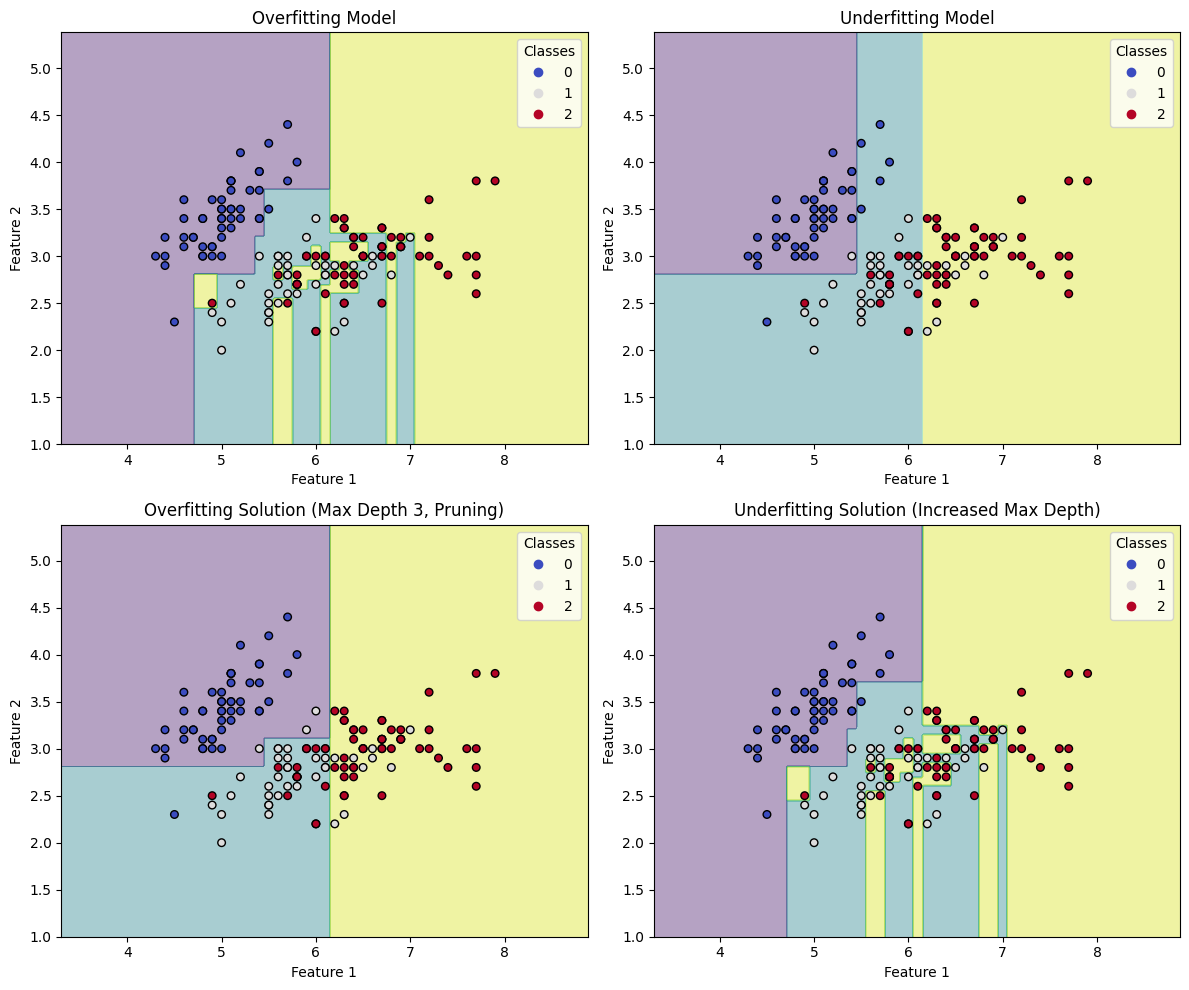

Overfitting Decision Tree Model
Accuracy on Test Set (Overfitting): 100.00%

Underfitting Decision Tree Model
Accuracy on Test Set (Underfitting): 96.67%

Solution for Overfitting (Max Depth 3, Pruning)
Accuracy on Test Set (Overfitting Solution): 100.00%

Solution for Underfitting (Increased Max Depth)
Accuracy on Test Set (Underfitting Solution): 100.00%


In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = load_iris()
X = data.data[:, :2]  # Only using the first two features for visualization
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===================
# Example 1: Overfitting
# ===================
# Create a decision tree with no depth limitation (max_depth=None)
clf_overfit = DecisionTreeClassifier(max_depth=None, random_state=42)
clf_overfit.fit(X_train, y_train)

# ===================
# Example 2: Underfitting
# ===================
# Create a shallow decision tree (max_depth=2)
clf_underfit = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_underfit.fit(X_train, y_train)

# ===================
# Solutions for Overfitting and Underfitting
# ===================
# Solution to Overfitting: Limit tree depth and/or use pruning
clf_overfit_solution = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf_overfit_solution.fit(X_train, y_train)

# Solution to Underfitting: Increase tree depth
clf_underfit_solution = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_underfit_solution.fit(X_train, y_train)

# ===================
# Function to Plot Decision Boundary
# ===================
def plot_decision_boundary(clf, X, y, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid based on the input data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict over the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(*scatter.legend_elements(), title="Classes")

# ===================
# Plotting the Decision Boundaries for All Models
# ===================
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Overfitting Model
plot_decision_boundary(clf_overfit, X, y, axs[0, 0], 'Overfitting Model')

# Plot for Underfitting Model
plot_decision_boundary(clf_underfit, X, y, axs[0, 1], 'Underfitting Model')

# Plot for Overfitting Solution Model
plot_decision_boundary(clf_overfit_solution, X, y, axs[1, 0], 'Overfitting Solution (Max Depth 3, Pruning)')

# Plot for Underfitting Solution Model
plot_decision_boundary(clf_underfit_solution, X, y, axs[1, 1], 'Underfitting Solution (Increased Max Depth)')

plt.tight_layout()
plt.show()

# Display the Results
print("Overfitting Decision Tree Model")
print(f"Accuracy on Test Set (Overfitting): {accuracy_overfit * 100:.2f}%")

print("\nUnderfitting Decision Tree Model")
print(f"Accuracy on Test Set (Underfitting): {accuracy_underfit * 100:.2f}%")

print("\nSolution for Overfitting (Max Depth 3, Pruning)")
print(f"Accuracy on Test Set (Overfitting Solution): {accuracy_overfit_solution * 100:.2f}%")

print("\nSolution for Underfitting (Increased Max Depth)")
print(f"Accuracy on Test Set (Underfitting Solution): {accuracy_underfit_solution * 100:.2f}%")
